In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8997 - loss: 0.3203 - val_accuracy: 0.9845 - val_loss: 0.0515
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9857 - loss: 0.0510 - val_accuracy: 0.9881 - val_loss: 0.0375
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0329 - val_accuracy: 0.9867 - val_loss: 0.0393
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9931 - loss: 0.0226 - val_accuracy: 0.9895 - val_loss: 0.0317
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy: 0.9894 - val_loss: 0.0387
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0489

Test Accuracy: 0.9894


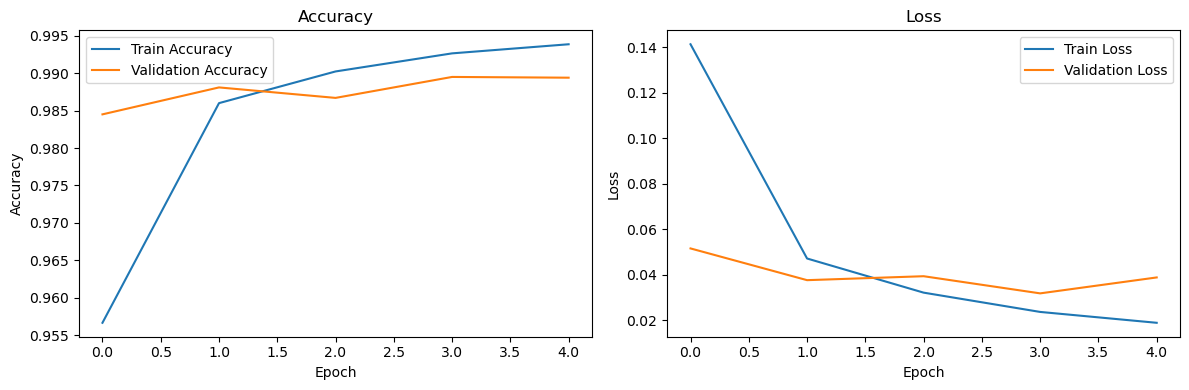

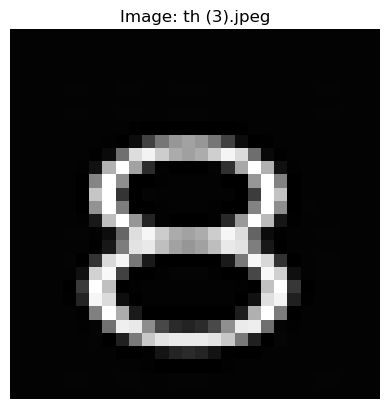

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Model Prediction for th (3).jpeg: 8
HTML file not found: C:/Users/kakad/OneDrive/Desktop/view (1).html


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from PIL import Image
import webbrowser
import os

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for Conv2D input: (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Prediction on custom image (only "th (3).jpeg" path)
image_paths = [
    "C:/Users/kakad/OneDrive/Desktop/th (3).jpeg"  # Only this image path is kept
]

for path in image_paths:
    try:
        img = Image.open(path).convert('L')  # Grayscale
        img = img.resize((28, 28))
        img = 255 - np.array(img)  # Invert background
        img = img / 255.0
        img_input = img.reshape(1, 28, 28, 1)

        # Display image
        plt.imshow(img, cmap='gray')
        plt.title(f"Image: {os.path.basename(path)}")
        plt.axis('off')
        plt.show()

        prediction = model.predict(img_input)
        predicted_class = np.argmax(prediction)
        print(f"Model Prediction for {os.path.basename(path)}: {predicted_class}")

    except FileNotFoundError:
        print(f"Image not found: {path}")

# Open the HTML file in default browser
html_path = "C:/Users/kakad/OneDrive/Desktop/view (1).html"
if os.path.exists(html_path):
    webbrowser.open(f"file:///{html_path}")
else:
    print(f"HTML file not found: {html_path}")
